=== EDGE DETECTION FILTER DEMO ===
Kernel A (Laplacian-like):
[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]

Kernel B (8-connected):
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


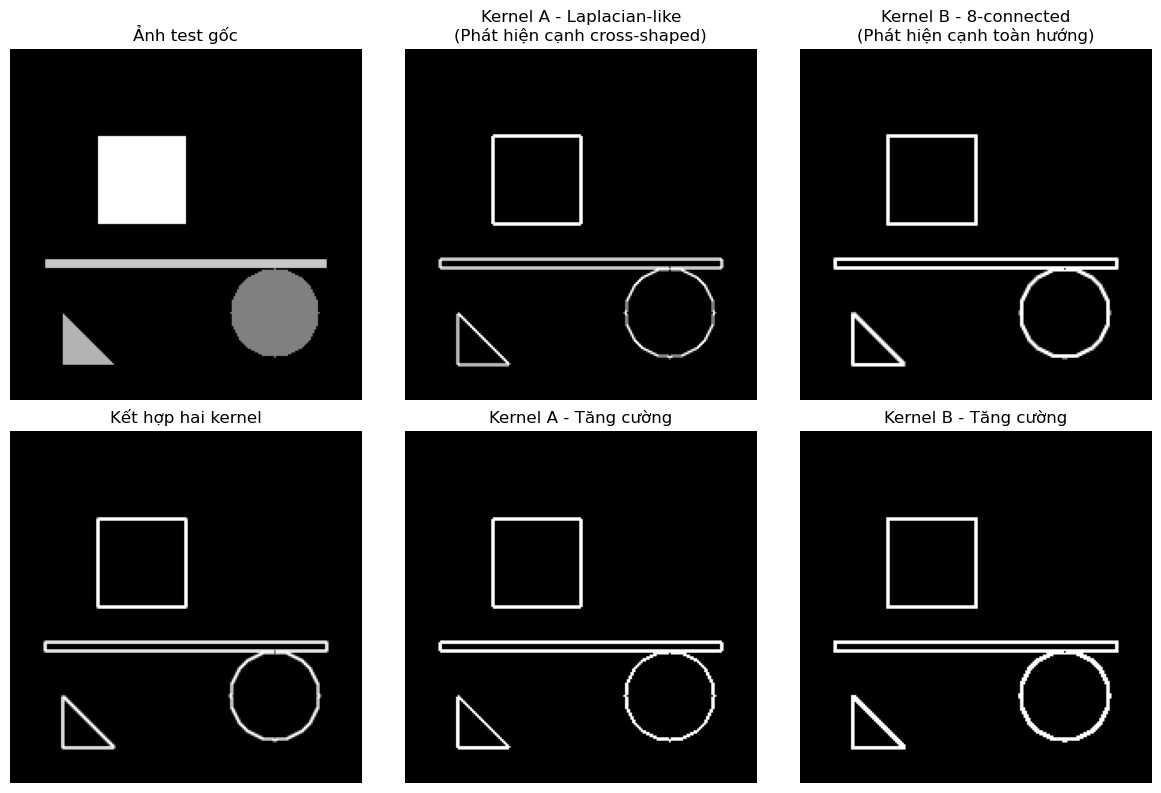

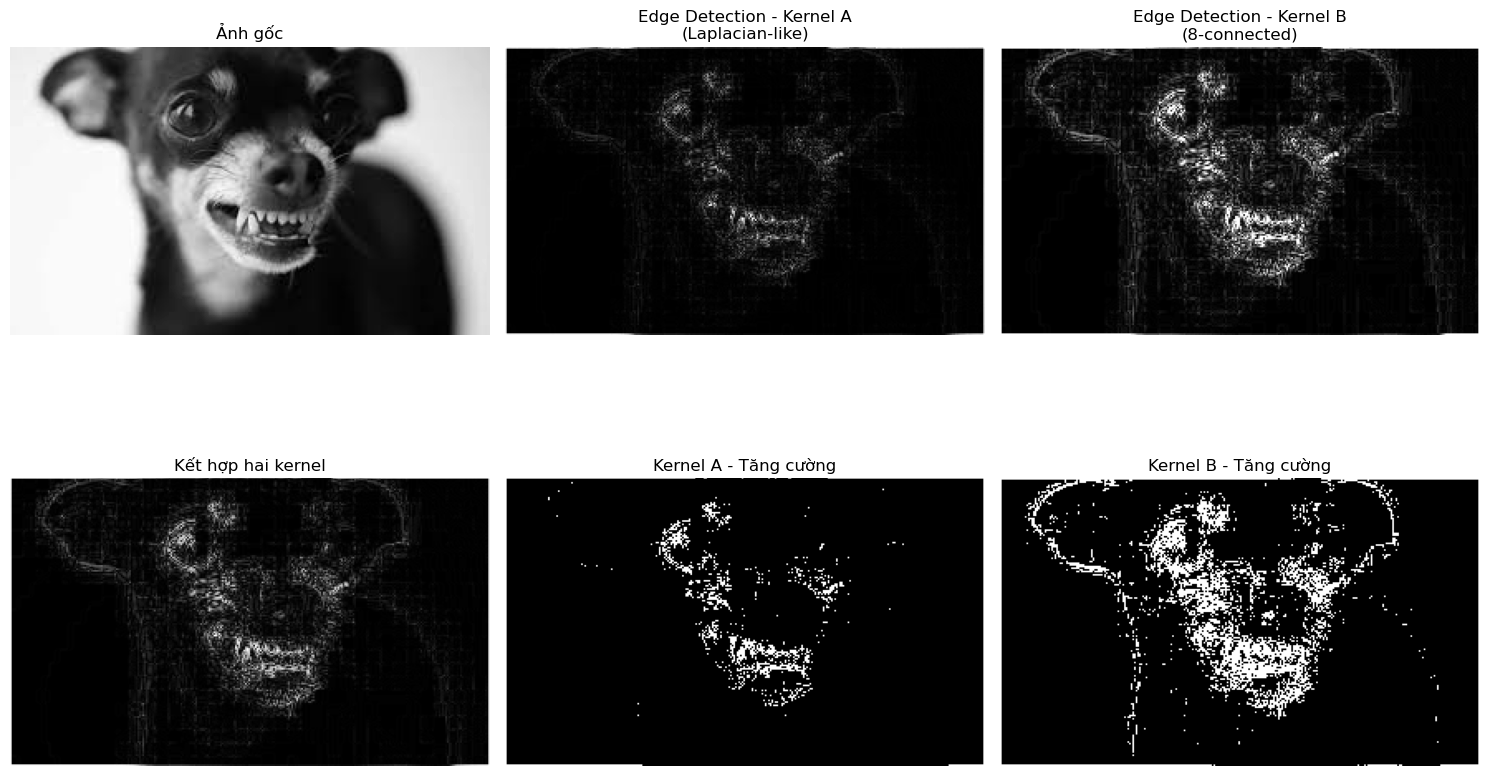

In [1]:
# Câu 2:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
def apply_edge_detection(image_array, kernel):
    """
    Áp dụng bộ lọc edge detection cho ảnh grayscale
    
    Args:
        image_array: Mảng numpy 2D chứa ảnh grayscale
        kernel: Ma trận kernel edge detection (3x3)
    
    Returns:
        Ảnh đã được detect edge (numpy array)
    """
    img_h, img_w = image_array.shape
    kernel_h, kernel_w = kernel.shape
    # Tính padding
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    # Thêm padding (zero padding cho edge detection)
    padded_img = np.pad(image_array, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    # Khởi tạo ảnh kết quả
    result = np.zeros_like(image_array, dtype=np.float64)
    # Áp dụng convolution
    for i in range(img_h):
        for j in range(img_w):
            # Trích xuất vùng ảnh tương ứng với kernel
            region = padded_img[i:i+kernel_h, j:j+kernel_w]
            # Tính tích chập
            result[i, j] = np.sum(region * kernel)
    # Xử lý giá trị âm bằng absolute value và normalize
    result = np.abs(result)
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)
def create_edge_kernels():
    """
    Tạo các ma trận kernel edge detection theo yêu cầu
    """
    # Kernel a: Laplacian-like filter
    kernel_a = np.array([
        [ 0, -1,  0],
        [-1,  4, -1],
        [ 0, -1,  0]
    ], dtype=np.float64)
    # Kernel b: Enhanced edge detection filter
    kernel_b = np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ], dtype=np.float64)
    return kernel_a, kernel_b
def apply_combined_edge_detection(image_array, kernel_a, kernel_b):
    """
    Áp dụng cả hai kernel và kết hợp kết quả
    
    Args:
        image_array: Ảnh đầu vào
        kernel_a: Ma trận kernel thứ nhất
        kernel_b: Ma trận kernel thứ hai
    
    Returns:
        Tuple (edge_a, edge_b, combined) - kết quả từ từng kernel và kết hợp
    """
    # Áp dụng từng kernel
    edge_a = apply_edge_detection(image_array, kernel_a)
    edge_b = apply_edge_detection(image_array, kernel_b)
    # Kết hợp hai kết quả (weighted average)
    combined = (0.5 * edge_a + 0.5 * edge_b).astype(np.uint8)
    return edge_a, edge_b, combined
def enhance_edges(edge_image, threshold=50):
    """
    Tăng cường độ tương phản của các cạnh
    
    Args:
        edge_image: Ảnh edge detection
        threshold: Ngưỡng để tăng cường (0-255)
    
    Returns:
        Ảnh đã được tăng cường cạnh
    """
    enhanced = edge_image.copy()
    # Áp dụng threshold để làm nổi bật cạnh
    enhanced[enhanced < threshold] = 0
    enhanced[enhanced >= threshold] = 255
    return enhanced
def process_image_edges(image_path):
    """
    Xử lý ảnh: đọc, chuyển grayscale, detect edges, hiển thị kết quả
    """
    try:
        # Đọc ảnh
        img = Image.open(image_path)
        # Chuyển sang grayscale
        if img.mode != 'L':
            img = img.convert('L')
        # Chuyển sang numpy array
        img_array = np.array(img, dtype=np.float64)
        # Tạo edge kernels
        kernel_a, kernel_b = create_edge_kernels()
        # Áp dụng edge detection
        edge_a, edge_b, combined = apply_combined_edge_detection(img_array, kernel_a, kernel_b)
        # Tăng cường cạnh
        enhanced_a = enhance_edges(edge_a)
        enhanced_b = enhance_edges(edge_b)
        # Hiển thị kết quả
        plt.figure(figsize=(15, 10))
        # Ảnh gốc
        plt.subplot(2, 3, 1)
        plt.imshow(img_array, cmap='gray')
        plt.title('Ảnh gốc')
        plt.axis('off')
        # Edge detection kernel A
        plt.subplot(2, 3, 2)
        plt.imshow(edge_a, cmap='gray')
        plt.title('Edge Detection - Kernel A\n(Laplacian-like)')
        plt.axis('off')
        # Edge detection kernel B
        plt.subplot(2, 3, 3)
        plt.imshow(edge_b, cmap='gray')
        plt.title('Edge Detection - Kernel B\n(8-connected)')
        plt.axis('off')
        # Combined result
        plt.subplot(2, 3, 4)
        plt.imshow(combined, cmap='gray')
        plt.title('Kết hợp hai kernel')
        plt.axis('off')
        # Enhanced edges A
        plt.subplot(2, 3, 5)
        plt.imshow(enhanced_a, cmap='gray')
        plt.title('Kernel A - Tăng cường')
        plt.axis('off')
        # Enhanced edges B
        plt.subplot(2, 3, 6)
        plt.imshow(enhanced_b, cmap='gray')
        plt.title('Kernel B - Tăng cường')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        return img_array, edge_a, edge_b, combined 
    except Exception as e:
        print(f"Lỗi khi xử lý ảnh: {e}")
        return None, None, None, None
def create_test_image():
    """
    Tạo ảnh test với các hình dạng có cạnh rõ ràng
    """
    img = np.zeros((200, 200), dtype=np.uint8)
    # Thêm hình chữ nhật
    img[50:100, 50:100] = 255
    # Thêm hình tròn
    center_x, center_y = 150, 150
    radius = 25
    y, x = np.ogrid[:200, :200]
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    img[mask] = 128
    # Thêm đường thẳng
    img[120:125, 20:180] = 200
    # Thêm tam giác
    for i in range(30):
        img[150+i, 30:30+i] = 180
    return img
def compare_kernels():
    """
    So sánh hiệu quả của hai kernel trên ảnh test
    """
    # Tạo ảnh test
    test_img = create_test_image()
    # Tạo kernels
    kernel_a, kernel_b = create_edge_kernels()
    print("Kernel A (Laplacian-like):")
    print(kernel_a)
    print("\nKernel B (8-connected):")
    print(kernel_b)
    # Áp dụng edge detection
    edge_a, edge_b, combined = apply_combined_edge_detection(test_img, kernel_a, kernel_b)
    # Hiển thị kết quả
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(test_img, cmap='gray')
    plt.title('Ảnh test gốc')
    plt.axis('off')
    plt.subplot(2, 3, 2)
    plt.imshow(edge_a, cmap='gray')
    plt.title('Kernel A - Laplacian-like\n(Phát hiện cạnh cross-shaped)')
    plt.axis('off')
    plt.subplot(2, 3, 3)
    plt.imshow(edge_b, cmap='gray')
    plt.title('Kernel B - 8-connected\n(Phát hiện cạnh toàn hướng)')
    plt.axis('off')
    plt.subplot(2, 3, 4)
    plt.imshow(combined, cmap='gray')
    plt.title('Kết hợp hai kernel')
    plt.axis('off')
    plt.subplot(2, 3, 5)
    plt.imshow(enhance_edges(edge_a), cmap='gray')
    plt.title('Kernel A - Tăng cường')
    plt.axis('off')
    plt.subplot(2, 3, 6)
    plt.imshow(enhance_edges(edge_b), cmap='gray')
    plt.title('Kernel B - Tăng cường')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    print("=== EDGE DETECTION FILTER DEMO ===")
    compare_kernels()
    original, edge_a, edge_b, combined = process_image_edges("D:/download.png")